# <span style = "background-color: #FFDDDD"> ÏßÅÏ†ë ÎßåÎì§Ïñ¥Î≥¥Îäî OCR</span>

‚≠êÔ∏è Text recognitionÏùÑ ÏúÑÌï¥ ÌäπÌôîÎêú Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§. ÌÖçÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï, ctc loss Ï∏°Ï†ïÏùÑ ÏúÑÌïú ÎùºÎ≤® Ïù∏ÏΩîÎî©, Î∞∞ÏπòÏ≤òÎ¶¨ Îì±Ïù¥ Ï†ÅÏ†àÌûà ÏàòÌñâÎêòÏóàÎã§.  
‚≠êÔ∏è 2. CRNN Í∏∞Î∞òÏùò recognition Î™®Îç∏Ïùò ÌïôÏäµÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§. ÌïôÏäµÍ≤∞Í≥º lossÍ∞Ä ÏïàÏ†ïÏ†ÅÏúºÎ°ú Í∞êÏÜåÌïòÍ≥† ÎåÄÎ∂ÄÎ∂ÑÏùò Î¨∏ÏûêÏù∏Ïãù Ï∂îÎ°† Í≤∞Í≥ºÍ∞Ä Ï†ïÌôïÌïòÎã§.  
‚≠êÔ∏è 3. keras-ocr detectorÏôÄ CRNN recognizerÎ•º ÏóÆÏñ¥ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÏûÖÎ†•ÏúºÎ°úÎ∂ÄÌÑ∞ textÍ∞Ä Ï∂úÎ†•ÎêòÎäî OCRÏù¥ End-to-EndÎ°ú Íµ¨ÏÑ±ÎêòÏóàÎã§. ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎ•º ÏõêÎ≥∏ÏúºÎ°ú Î∞õÏïÑ OCR ÏàòÌñâ Í≤∞Í≥ºÎ•º Î¶¨ÌÑ¥ÌïòÎäî 1Í∞úÏùò Ìï®ÏàòÍ∞Ä ÎßåÎì§Ïñ¥Ï°åÎã§.

---
## <span style = "background-color: #FFFFDD"> üê∂ Environment Settings</span>

### <span style = "background-color: #F0E9FF"> 1. Import libraries & packages </span>

In [2]:
# useful tools
import re
import six
import math
import lmdb
import os

In [3]:
# data array
import numpy as np

In [4]:
# image data handling
from IPython.display import display
from PIL import Image
from PIL import ImageDraw
import cv2

In [5]:
# visualization
import matplotlib.pyplot as plt

In [6]:
# machine learning
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence

import keras_ocr
from keras_ocr.detection import Detector

In [7]:
# load dataset
import lmdb

### <span style = "background-color: #F0E9FF"> 2. Define constants</span>

In [8]:
DATA_PATH = os.getenv("HOME") + "/aiffel/ocr"

TRAIN_DATA_PATH = DATA_PATH + "/data/MJ/MJ_train"
VALID_DATA_PATH = DATA_PATH + "/data/MJ/MJ_valid"
TEST_DATA_PATH = DATA_PATH + "/data/sample.jpg"

In [9]:
NUM_CHAR = "0123456789"
ENG_CHAR_UPPER = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

TARGET_CHARACTERS = ENG_CHAR_UPPER + NUM_CHAR

In [10]:
# model training configurations
BATCH_SIZE = 128
EPOCHS =30

### <span style = "background-color: #F0E9FF"> 3. Define frequently used methods</span>

In [11]:
DIVIDER_LENGTH = 80

def print_single_divider(length = DIVIDER_LENGTH):
    print("-" * DIVIDER_LENGTH)

def print_double_divider(length = DIVIDER_LENGTH):
    print("=" * DIVIDER_LENGTH)

### <span style = "background-color: #F0E9FF"> 4. Check GPU settings</span>

In [11]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

---
## <span style = "background-color: #FFFFDD"> üê∂ Data Preparation</span>

### <span style = "background-color: #F0E9FF"> 1. Load dataset</span>

In [12]:
# envÏóê Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¨Í≤åÏöî
# lmdbÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¨ Îïå envÎùºÎäî Î≥ÄÏàòÎ™ÖÏùÑ ÏÇ¨Ïö©ÌïòÎäîÍ≤å ÏùºÎ∞òÏ†ÅÏù¥ÏóêÏöî
env = lmdb.open(TRAIN_DATA_PATH, 
                max_readers=32, 
                readonly=True, 
                lock=False, 
                readahead=False, 
                meminit=False)

### <span style = "background-color: #F0E9FF"> 2. Preview dataset</span>

--------------------------------------------------------------------------------
> Original image size : width 72, height 31
> Target image size : (74, 32)
> Display image shape : (74, 32, 3)
> Label : Lube
> Preview : 


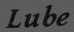

--------------------------------------------------------------------------------
> Original image size : width 82, height 31
> Target image size : (84, 32)
> Display image shape : (84, 32, 3)
> Label : Spencerian
> Preview : 


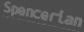

--------------------------------------------------------------------------------
> Original image size : width 115, height 31
> Target image size : (100, 32)
> Display image shape : (100, 32, 3)
> Label : accommodatingly
> Preview : 


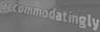

--------------------------------------------------------------------------------
> Original image size : width 140, height 31
> Target image size : (100, 32)
> Display image shape : (100, 32, 3)
> Label : CARPENTER
> Preview : 


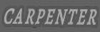

In [13]:
# Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞Î•º txn(transaction)Ïù¥ÎùºÎäî Î≥ÄÏàòÎ•º ÌÜµÌï¥ ÏóΩÎãàÎã§
# Ïù¥Ï†ú txnÎ≥ÄÏàòÎ•º ÌÜµÌï¥ ÏßÅÏ†ë Îç∞Ïù¥ÌÑ∞Ïóê Ï†ëÍ∑º Ìï† Ïàò ÏûàÏñ¥Ïöî
with env.begin(write=False) as txn:
    for index in range(1, 5):
        # indexÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÎùºÎ≤® ÌÇ§ÏôÄ Ïù¥ÎØ∏ÏßÄ ÌÇ§Î•º ÎßåÎì§Î©¥
        # txnÏóêÏÑú ÎùºÎ≤®Í≥º Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥Ïò¨ Ïàò ÏûàÏñ¥Ïöî
        label_key = 'label-%09d'.encode() % index
        label = txn.get(label_key).decode('utf-8')
        img_key = 'image-%09d'.encode() % index
        imgbuf = txn.get(img_key)
        buf = six.BytesIO()
        buf.write(imgbuf)
        buf.seek(0)

        # Ïù¥ÎØ∏ÏßÄÎäî Î≤ÑÌçºÎ•º ÌÜµÌï¥ ÏùΩÏñ¥Ïò§Í∏∞ ÎïåÎ¨∏Ïóê 
        # Î≤ÑÌçºÏóêÏÑú Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ïÏù¥ Îã§Ïãú ÌïÑÏöîÌï¥Ïöî
        try:
            img = Image.open(buf).convert('RGB')

        except IOError:
            img = Image.new('RGB', (100, 32))
            label = '-'

        
        print_single_divider()
        
        # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ï∂úÎ†•Ìï¥ Î¥ÖÎãàÎã§
        width, height = img.size
        print("> Original image size : width {}, height {}".format(width, height))
        
        # Ïù¥ÎØ∏ÏßÄ ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú ÎÜíÏù¥Î•º 32Î°ú Î∞îÍøÄÍ±∞ÏóêÏöî
        # ÌïòÏßÄÎßå ÎÑàÎπÑÎ•º 100Î≥¥Îã§Îäî ÏûëÍ≤åÌïòÍ≥† Ïã∂Ïñ¥Ïöî
        target_width = min(int(width*32/height), 100)
        target_img_size = (target_width,32)        
        print("> Target image size : {}".format(target_img_size))        
        img = np.array(img.resize(target_img_size)).transpose(1,0,2)

        # Ïù¥Ï†ú ÎÜíÏù¥Í∞Ä 32Î°ú ÏùºÏ†ïÌïú Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ Ìï®Íªò Ï∂úÎ†•Ìï† Ïàò ÏûàÏñ¥Ïöî       
        print("> Display image shape : {}".format(img.shape))
        print("> Label : {}".format(label))
        print("> Preview : ")
        display(Image.fromarray(img.transpose(1,0,2).astype(np.uint8)))

### <span style = "background-color: #F0E9FF"> 3. Pre-process data</span>

**3-1. Define dataset transfer methods/classes**

In [14]:
class MJDatasetSequence(Sequence):
    # Í∞ùÏ≤¥Î•º Ï¥àÍ∏∞Ìôî Ìï† Îïå lmdbÎ•º Ïó¥Ïñ¥ envÏóê Ï§ÄÎπÑÌï¥Îë°ÎãàÎã§
    # Îòê, lmdbÏóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º ÎØ∏Î¶¨ ÌååÏïÖÌï¥Îë°ÎãàÎã§
    def __init__(self, 
                 dataset_path,
                 label_converter,
                 batch_size=1,
                 img_size=(100,32),
                 max_text_len=22,
                 is_train=False,
                 character='') :
        
        self.label_converter = label_converter
        self.batch_size = batch_size
        self.img_size = img_size
        self.max_text_len = max_text_len
        self.character = character
        self.is_train = is_train
        self.divide_length = 100

        self.env = lmdb.open(dataset_path, max_readers=32, readonly=True, lock=False, readahead=False, meminit=False)
        with self.env.begin(write=False) as txn:
            self.num_samples = int(txn.get('num-samples'.encode()))
            self.index_list = [index + 1 for index in range(self.num_samples)]
        

    def __len__(self):
        return math.ceil(self.num_samples/self.batch_size/self.divide_length)
    
    # indexÏóê Ìï¥ÎãπÌïòÎäî imageÏôÄ labelÏùÑ ÏùΩÏñ¥ÏòµÎãàÎã§
    # ÏúÑÏóêÏÑú ÏÇ¨Ïö©Ìïú ÏΩîÎìúÏôÄ Îß§Ïö∞ Ïú†ÏÇ¨Ìï©ÎãàÎã§
    # labelÏùÑ Ï°∞Í∏à Îçî Îã§Îì¨Îäî Í≤ÉÏù¥ ÏïΩÍ∞Ñ Îã§Î¶ÖÎãàÎã§
    def _get_img_label(self, index):
        with self.env.begin(write=False) as txn:
            label_key = 'label-%09d'.encode() % index
            label = txn.get(label_key).decode('utf-8')
            img_key = 'image-%09d'.encode() % index
            imgbuf = txn.get(img_key)

            buf = six.BytesIO()
            buf.write(imgbuf)
            buf.seek(0)
            try:
                img = Image.open(buf).convert('RGB')

            except IOError:
                img = Image.new('RGB', self.img_size)
                label = '-'
            width, height = img.size
            
            target_width = min(int(width*self.img_size[1]/height), self.img_size[0])
            target_img_size = (target_width, self.img_size[1])
            img = np.array(img.resize(target_img_size)).transpose(1,0,2)
            # labelÏùÑ ÏïΩÍ∞Ñ Îçî Îã§Îì¨ÏäµÎãàÎã§
            label = label.upper()
            out_of_char = f'[^{self.character}]'
            label = re.sub(out_of_char, '', label)
            label = label[:self.max_text_len]

        return (img, label)
    
    # __getitem__ÏùÄ ÏïΩÏÜçÎêòÏñ¥ÏûàÎäî Î©îÏÑúÎìúÏûÖÎãàÎã§
    # Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏûëÏÑ±ÌïòÎ©¥ sliceÌï† Ïàò ÏûàÏäµÎãàÎã§
    # ÏûêÏÑ∏Ìûà ÏïåÍ≥† Ïã∂Îã§Î©¥ ÏïÑÎûò Î¨∏ÏÑúÎ•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî
    # https://docs.python.org/3/reference/datamodel.html#object.__getitem__
    # 
    # 1. idxÏóê Ìï¥ÎãπÌïòÎäî index_listÎßåÌÅº Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨
    # 2. imageÏôÄ labelÏùÑ Î∂àÎü¨Ïò§Í≥† 
    # 3. ÏÇ¨Ïö©ÌïòÍ∏∞ Ï¢ãÏùÄ inputsÍ≥º outputsÌòïÌÉúÎ°ú Î∞òÌôòÌï©ÎãàÎã§
    def __getitem__(self, idx):
        # 1.
        batch_indicies = self.index_list[
            idx*self.batch_size:
            (idx+1)*self.batch_size
        ]
        input_images = np.zeros([self.batch_size, *self.img_size, 3])
        labels = np.zeros([self.batch_size, self.max_text_len], dtype='int64')

        input_length = np.ones([self.batch_size], dtype='int64') * self.max_text_len
        label_length = np.ones([self.batch_size], dtype='int64')

        # 2.
        for i, index in enumerate(batch_indicies):
            img, label = self._get_img_label(index)
            encoded_label = self.label_converter.encode(label)
            # Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú '-'Ïù¥ Ï∂îÍ∞ÄÎêòÎ©¥ max_text_lenÎ≥¥Îã§ Í∏∏Ïñ¥Ïßà Ïàò ÏûàÏñ¥Ïöî
            if len(encoded_label) > self.max_text_len:
                continue
            width = img.shape[0]
            input_images[i,:width,:,:] = img
            labels[i,0:len(encoded_label)] = encoded_label
            label_length[i] = len(encoded_label)
        
        # 3.
        inputs = {
            'input_image': input_images,
            'label': labels,
            'input_length': input_length,
            'label_length': label_length,
        }
        outputs = {'ctc': np.zeros([self.batch_size, 1])}

        return inputs, outputs

**3-2. Define TEXT -> NUMBER label encoding methods**

In [15]:
class LabelConverter(object):
    
    def __init__(self, character):
        self.character = "-" + character
        self.label_map = dict()
        for i, char in enumerate(self.character):
            self.label_map[char] = i
            
    def encode(self, text):
        encoded_label = []
        # [[YOUR CODE]]
        for i, char in enumerate(text):
            if i > 0 and char == text[i - 1]:
                encoded_label.append(0)    # Í∞ôÏùÄ Î¨∏Ïûê ÏÇ¨Ïù¥Ïóê Í≥µÎ∞± Î¨∏Ïûê labelÏùÑ ÏÇΩÏûÖ
            encoded_label.append(self.label_map[char])
        
        return np.array(encoded_label)
    
    def decode(self, encoded_label):
        target_characters = list(self.character)
        decoded_label = ""
        for encode in encoded_label:
            decoded_label += self.character[encode]
        return decoded_label

In [16]:
label_converter = LabelConverter(TARGET_CHARACTERS)

### <span style = "background-color: #F0E9FF"> 4. Prepare final train-ready data</span>

**4-1. Prepare training data**

In [17]:
train_data = MJDatasetSequence(TRAIN_DATA_PATH,
                               label_converter,
                               batch_size=BATCH_SIZE,
                               character=TARGET_CHARACTERS,
                               is_train=True)

**4-2. Prepare validation data**

In [18]:
val_data = MJDatasetSequence(VALID_DATA_PATH,
                             label_converter,
                             batch_size=BATCH_SIZE,
                             character=TARGET_CHARACTERS)

---
## <span style = "background-color: #FFFFDD"> üê∂ Model Preparation</span>

### <span style = "background-color: #F0E9FF"> 1. Prepare text detection model</span>

In [19]:
# load pre-trained model (keras_ocr.detection.Detector)
detector = Detector()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5


### <span style = "background-color: #F0E9FF"> 2. Prepare text recognition model</span>

**2-1. Define CRNN model structure**

In [20]:
def build_crnn_model(input_shape=(100,32,3), characters=TARGET_CHARACTERS):
    num_chars = len(characters)+2
    image_input = layers.Input(shape=input_shape, dtype='float32', name='input_image')
    
    # Build CRNN model
    conv = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(image_input)
    conv = layers.MaxPooling2D(pool_size=(2, 2))(conv)
    conv = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.MaxPooling2D(pool_size=(2, 2))(conv)
    conv = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.MaxPooling2D(pool_size=(1, 2))(conv)
    conv = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.BatchNormalization()(conv)
    conv = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.BatchNormalization()(conv)
    conv = layers.MaxPooling2D(pool_size=(1, 2))(conv)     
    feature = layers.Conv2D(512, (2, 2), activation='relu', kernel_initializer='he_normal')(conv)
    sequnce = layers.Reshape(target_shape=(24, 512))(feature)
    sequnce = layers.Dense(64, activation='relu')(sequnce)
    sequnce = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(sequnce)
    sequnce = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(sequnce)
    y_pred = layers.Dense(num_chars, activation='softmax', name='output')(sequnce)

    labels = layers.Input(shape=[22], dtype='int64', name='label')
    input_length = layers.Input(shape=[1], dtype='int64', name='input_length')
    label_length = layers.Input(shape=[1], dtype='int64', name='label_length')
    loss_out = layers.Lambda(ctc_lambda_func, output_shape=(1,), name="ctc")(
        [labels, y_pred, label_length, input_length]
    )
    model_input = [image_input, labels, input_length, label_length]
    model = Model(
        inputs=model_input,
        outputs=loss_out
    )
    return model

**2-2. Define model optimizing options**

In [21]:
def ctc_lambda_func(args): # CTC lossÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌïú Lambda Ìï®Ïàò
    labels, y_pred, label_length, input_length = args
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [22]:
optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.1, clipnorm=5)

**2-3. Train the model and save by epochs**

In [23]:
# list to save history by each 10 epochs
loss_per_epoch = []
val_loss_per_epoch = []

In [25]:
for i in range(0, EPOCHS, 10):
    # prepare model to train
    model = build_crnn_model()
    
    if i != 0:    # load previously trained model
        model.load_weights("crnn_epochs_" + str(i))

        
    # train the model
    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred},
                  optimizer=optimizer)
    
    history = model.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=10,
                        validation_data=val_data,
                        validation_steps=len(val_data),
                       )
    
    # save the model
    loss_per_epoch.extend(history.history["loss"])
    val_loss_per_epoch.extend(history.history["val_loss"])
    
    model.save_weights("crnn_epochs_" + str(i+10))
    print("> Model training finished & saved successfully!")

Epoch 1/10
565/565 [==============================] - 89s 147ms/step - loss: 25.2610 - val_loss: 24.5317
Epoch 2/10
565/565 [==============================] - 82s 145ms/step - loss: 14.6838 - val_loss: 9.4169
Epoch 3/10
565/565 [==============================] - 82s 145ms/step - loss: 7.1816 - val_loss: 6.9218
Epoch 4/10
565/565 [==============================] - 82s 145ms/step - loss: 5.1789 - val_loss: 5.2361
Epoch 5/10
565/565 [==============================] - 82s 145ms/step - loss: 4.1263 - val_loss: 4.9019
Epoch 6/10
565/565 [==============================] - 82s 145ms/step - loss: 3.3867 - val_loss: 4.7164
Epoch 7/10
565/565 [==============================] - 82s 144ms/step - loss: 2.7998 - val_loss: 4.1798
Epoch 8/10
565/565 [==============================] - 82s 144ms/step - loss: 2.3088 - val_loss: 4.1942
Epoch 9/10
565/565 [==============================] - 81s 144ms/step - loss: 1.8961 - val_loss: 4.2027
Epoch 10/10
565/565 [==============================] - 82s 145ms/step 

**2-4. Visualize model training performance**

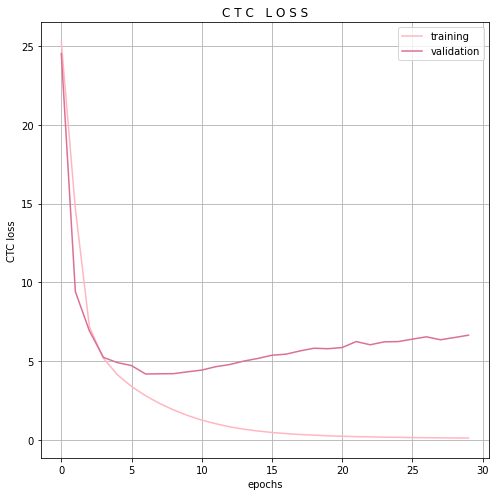

In [31]:
fig = plt.figure(figsize=(7,7))

loss_graph = fig.add_subplot(1, 1, 1)
loss_graph.plot(loss_per_epoch, color="lightpink", label="training")
loss_graph.plot(val_loss_per_epoch, color="palevioletred", label="validation")
loss_graph.set_title("C T C   L O S S")
loss_graph.set_xlabel("epochs")
loss_graph.set_ylabel("CTC loss")
loss_graph.grid()
loss_graph.legend()

plt.tight_layout()
plt.show()

---
## <span style = "background-color: #FFFFDD"> üê∂ Experiments</span>

### <span style = "background-color: #F0E9FF"> 1. Prepare inference models</span>

In [32]:
rcnn_trained_10 = build_crnn_model()
rcnn_trained_10.load_weights("crnn_epochs_10")
rcnn_trained_10_pred = Model(inputs=rcnn_trained_10.get_layer("input_image").output,
                            outputs=rcnn_trained_10.get_layer("output").output)

In [33]:
rcnn_trained_20 = build_crnn_model()
rcnn_trained_20.load_weights("crnn_epochs_20")
rcnn_trained_20_pred = Model(inputs=rcnn_trained_20.get_layer("input_image").output,
                            outputs=rcnn_trained_20.get_layer("output").output)

In [34]:
rcnn_trained_30 = build_crnn_model()
rcnn_trained_30.load_weights("crnn_epochs_30")
rcnn_trained_30_pred = Model(inputs=rcnn_trained_30.get_layer("input_image").output,
                            outputs=rcnn_trained_30.get_layer("output").output)

In [ ]:
#rcnn_trained_40 = build_crnn_model()
#rcnn_trained_40.load_weights("crnn_epochs_40")
#rcnn_trained_40_pred = Model(inputs=rcnn_trained_40.get_layer("input_image").output,
#                            outputs=rcnn_trained_40.get_layer("output").output)

In [ ]:
#rcnn_trained_50 = build_crnn_model()
#rcnn_trained_50.load_weights("crnn_epochs_50")
#rcnn_trained_50_pred = Model(inputs=rcnn_trained_50.get_layer("input_image").output,
#                            outputs=rcnn_trained_50.get_layer("output").output)

In [35]:
rcnn_preds = [rcnn_trained_10_pred,
              rcnn_trained_20_pred,
              rcnn_trained_30_pred,
              #rcnn_trained_40_pred,
              #rcnn_trained_50_pred,
             ]

### <span style = "background-color: #F0E9FF"> 2. Define experimental methods</span>

**2-1. Define text detection experimental methods**

In [23]:
def detect_text(img_path):

    # Load the image
    img = keras_ocr.tools.read(img_path)

    # Î∞∞Ïπò ÌÅ¨Í∏∞Î•º ÏúÑÌï¥ÏÑú dimensionÏùÑ ÌôïÏû•Ìï¥Ï£ºÍ≥† kera-ocrÏùò ÏûÖÎ†• Ï∞®ÏõêÏóê ÎßûÍ≤å H,W,CÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
    # Î∞∞ÏπòÏùò Ï≤´ Î≤àÏß∏ Í≤∞Í≥ºÎßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
    ocr_result = detector.detect(images=[img])[0]

    # ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ÏÑú xÏôÄ yÏ¢åÌëúÎ•º Î≥ÄÍ≤ΩÌï¥Ï§çÎãàÎã§. (ÏïûÏÑ† h dimensionÏúºÎ°ú Ïù∏Ìï¥ y,xÎ°ú ÌëúÍ∏∞Îê®)
    result_img = Image.fromarray(img)
    img_draw = ImageDraw.Draw(result_img)
    
    cropped_imgs = []
    for text_result in ocr_result:
        img_draw.polygon(text_result, outline='red')
        x_min = text_result[:,0].min() - 5
        x_max = text_result[:,0].max() + 5
        y_min = text_result[:,1].min() - 5
        y_max = text_result[:,1].max() + 5
        word_box = [x_min, y_min, x_max, y_max]
        cropped_imgs.append(Image.fromarray(img).crop(word_box))
        #cropped_imgs.append(img_result.crop(word_box))

    return result_img, cropped_imgs

**2-2. Define text recognition experimental methods**

In [24]:
# Î™®Îç∏Ïù¥ inferenceÌïú Í≤∞Í≥ºÎ•º Í∏ÄÏûêÎ°ú Î∞îÍøîÏ£ºÎäî Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§
# ÏΩîÎìú ÌïòÎÇòÌïòÎÇòÎ•º Ïù¥Ìï¥ÌïòÍ∏∞Îäî Ï°∞Í∏à Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏäµÎãàÎã§
def decode_predict_ctc(out, chars = TARGET_CHARACTERS):
    results = []
    indexes = K.get_value(
        K.ctc_decode(
            out, input_length=np.ones(out.shape[0]) * out.shape[1],
            greedy=False , beam_width=5, top_paths=1
        )[0][0]
    )[0]
    text = ""
    for index in indexes:
        text += chars[index]
    results.append(text)
    return results

In [64]:
def recognize_img(pil_img, input_img_size=(100,32)):
    # TODO: ÏûòÎ†§ÏßÑ Îã®Ïñ¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïù∏ÏãùÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî!
    img_arr = np.array(pil_img)
    img_arr = cv2.resize(img_arr, (input_img_size[1], input_img_size[0]))
    img_arr = np.expand_dims(img_arr, axis=0)
    
    results = []
    for model in rcnn_preds:
        prediction = model.predict(np.array(img_arr))
        decoded_result = decode_predict_ctc(prediction, chars="-"+TARGET_CHARACTERS)[0].replace('-','')
        results.append(decoded_result)
        
    print("> Recognized text by 10-epoch-trained model : \t", results[0])
    print("> Recognized text by 20-epoch-trained model : \t", results[1])
    print("> Recognized text by 30-epoch-trained model : \t", results[2])

### <span style = "background-color: #F0E9FF"> 3. Prepare test data samples</span>

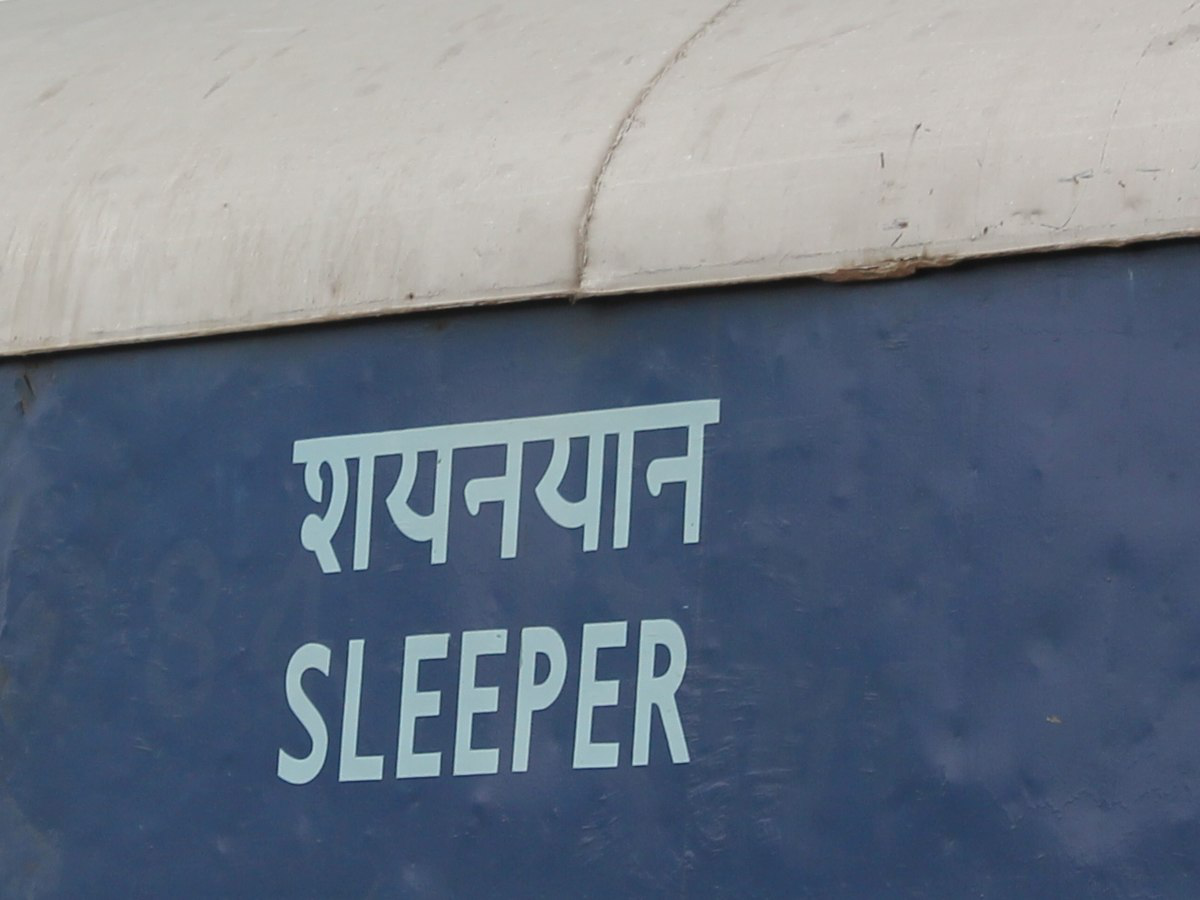

In [25]:
test_sample_img = Image.open(TEST_DATA_PATH)
display(test_sample_img)

### <span style = "background-color: #F0E9FF"> 3. Experiment with various models</span>

In [26]:
detected_img, cropped_img_list = detect_text(TEST_DATA_PATH)

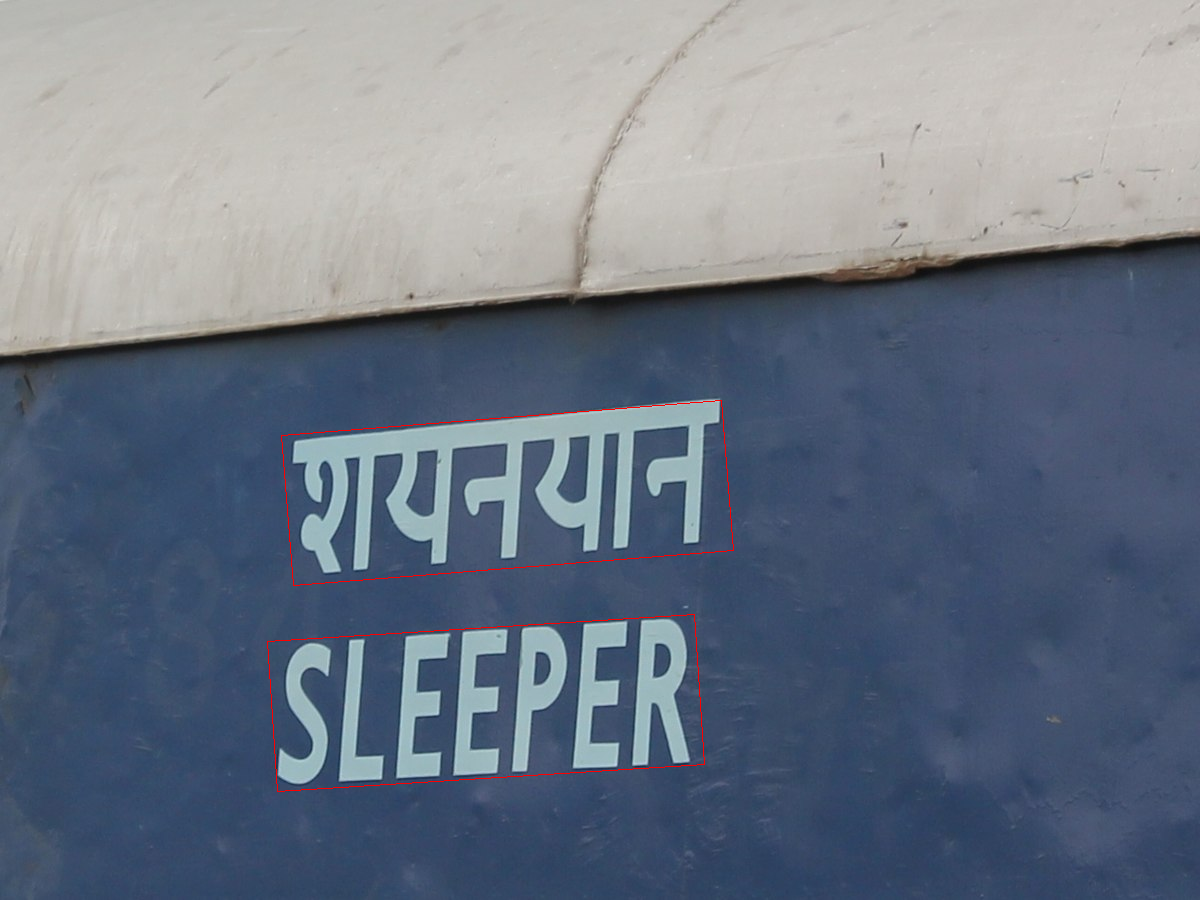

In [27]:
display(detected_img)

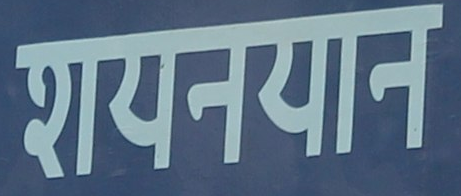

> Recognized text by 10-epoch-trained model : 	 NS999999999999999999999
> Recognized text by 20-epoch-trained model : 	 JST999999999999999999999
> Recognized text by 30-epoch-trained model : 	 ST9999999999999999999999


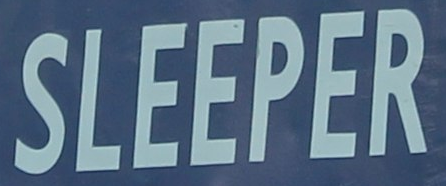

> Recognized text by 10-epoch-trained model : 	 ESOSE9999999999999999999
> Recognized text by 20-epoch-trained model : 	 EIE999999999999999999999
> Recognized text by 30-epoch-trained model : 	 ES9999999999999999999999


In [82]:
for _img in cropped_img_list:
    # display text-detected region
    display(_img)
    
    # prediction(recognition) result 
    recognize_img(_img)

---
## <span style = "background-color: #FFFFDD"> üê∂ Conclusion</span>

**üìù Ïã§ÌóòÍ≤∞Í≥º Î∂ÑÏÑù**
- ÌÖåÏä§Ìä∏ Í≤∞Í≥º Ï†ïÌôïÎèÑÎäî ÏóâÎßùÏù¥ÏòÄÎã§!üòÜ ÏôÑÏ†ÑÌûà ÏóâÎßùÏù¥ÎùºÍ∏∞ÏóêÎäî ÏñºÏ∂î ÎπÑÏä∑ÌïòÍ≤å ÏÉùÍ∏¥ Î¨∏ÏûêÎÅºÎ¶¨ ÌòºÎèôÏùÑ ÌïòÎäî ÎìØ ÌñàÎã§.
- ÎπÑÎ°ù ÌÖçÏä§Ìä∏ Ïù∏Ïãù Ï†ïÌôïÎèÑÎäî Îñ®Ïñ¥ÏßÄÏßÄÎßå, ÌïôÏäµ epoch ÏàòÏóê Îî∞Îùº Ïù∏Ïãù ÏÑ±Îä•Ïù¥ Îã¨ÎùºÏßÄÎäî Í≤ÉÏùÑ Ï≤¥Í∞êÌï† Ïàò ÏûàÏóàÎã§. ÌïôÏäµ epoch ÏàòÍ∞Ä Ï†ÅÏùÑÏàòÎ°ù ÌÖçÏä§Ìä∏ Î¨∏ÏûêÏùò Í∏∏Ïù¥Îäî ÏñºÏ∂î ÎπÑÏä∑ÌïòÍ≤å Ïú†Ï∂îÌïòÎäî ÎìØ ÌñàÎã§. Î∞òÎ©¥ ÌïôÏäµ epoch ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Î¨∏Ïûê ÏûêÏ≤¥Î•º Ïù∏ÏãùÏùÑ Î™ªÌïòÎäîÍ±¥ÏßÄ, Ïù∏Ïãù Í≤∞Í≥ºÏùò Í∏∏Ïù¥Í∞Ä Ï†êÏ†ê ÏßßÏïÑÏ°åÎã§. SLEEPERÎäî Ï¥ù 7Í∞úÏùò Î¨∏ÏûêÏù∏Îç∞, epoch 10ÎßåÌÅº ÌïôÏäµÌïú Î™®Îç∏ÏùÄ 5Í∞úÏùò Î¨∏ÏûêÎ•º, epoch 20ÎßåÌÅº ÌïôÏäµÌïú Î™®Îç∏ÏùÄ 3Í∞úÏùò Î¨∏ÏûêÎ•º, epoch 30ÎßåÌÅº ÌïôÏäµÌïú Î™®Îç∏ÏùÄ 2Í∞úÏùò Î¨∏ÏûêÎ•º Ïù∏ÏãùÌïòÏòÄÎã§.
- ÏùºÎ∞òÏ†ÅÏúºÎ°úÎäî ÌïôÏäµ epoch ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥ÎäîÎç∞ CRNNÏùò Í≤ΩÏö∞ Í∑∏Î†áÏßÄ ÏïäÏïòÎã§. ÌäπÌûà CTC loss Í∑∏ÎûòÌîÑÏóê ÏùòÌïòÎ©¥ epoch=5 Ï†ÑÌõÑÎ°ú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏïòÏùÑ Í≤ÉÏúºÎ°ú Ïú†Ï∂îÎêòÎäîÎç∞, epoch=5 ÏßÄÏ†êÏóêÏÑú Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏòàÏ∏°ÌïòÏòÄÎã§Î©¥ Îçî ÎÇòÏùÄ Ïù∏Ïãù Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÏùÑÏßÄÎèÑ Î™®Î•¥Í≤†Îã§.

**üìù ÌöåÍ≥†Î°ù**  
- Î¨∏ÏûêÎ•º Ïù∏ÏãùÌïòÍ≥† ÎÇ®ÏùÄ Í∏∏Ïù¥ÎßåÌÅº "9"Î°ú Ï±ÑÏõåÏ†∏ÏûàÎäîÎç∞, Ïã§Ï†ÑÏóêÏÑúÎäî Ïñ¥ÎñªÍ≤å ÌõÑÏ≤òÎ¶¨Î•º ÌïòÎ©¥ Ï¢ãÏùÑÍπå? Îã®ÏàúÌïòÍ≤å rstrip("9")Î•º Ï†ÅÏö©ÌïúÎã§Î©¥, Ïã§Ï†úÎ°ú "9"Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Ïù¥ÎØ∏ÏßÄÎ•º Ïù∏ÏãùÌï† Îïå ÌòºÎèôÏù¥ ÏùºÏñ¥ÎÇ† Í≤ÉÏù¥Îã§. -> ÌçºÏã§ÎãòÍªò ÏßàÎ¨∏Ìïú Í≤∞Í≥º endtoken Î∂ÄÎ∂ÑÏùÑ Ï°∞Ï†ïÌï¥Î≥º Í≤ÉÏùÑ Ï°∞Ïñ∏Ìï¥Ï£ºÏÖ®Îã§. 
- Îã§Î•∏ Í∑∏Î£®Îì§Ïù¥ Ïã§ÌóòÌï¥Î≥¥Îäî Í≤ÉÏùÑ ÏòÜÏóêÏÑú Í∏∞ÏõÉÍ±∞Î¶∞ Í≤∞Í≥º, Ïù¥Î≤à Ïã§ÌóòÏóêÏÑú ÏÇ¨Ïö©Ìïú CRNN Ïô∏Ïùò Îã§Î•∏ Î™®Îç∏Ïùò Í≤ΩÏö∞ input image Ïùò Ï†ÑÏ≤òÎ¶¨ ÏÉÅÌÉúÏóê Îî∞Îùº ÏÑ±Îä•Ïù¥ Îã¨ÎùºÏßÄÎäî ÎìØ ÌñàÎã§. ÏòàÎ•º Îì§Ïñ¥ CRNNÏùò Í≤ΩÏö∞ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÎ°úÎ∂ÄÌÑ∞ ÌÖçÏä§Ìä∏ ÏòÅÏó≠Ïù¥ Í∞êÏßÄÎêúÎßåÌÅº cropÌïú ÌõÑ Ìï¥Îãπ Î∂ÄÎ∂ÑÏùÑ ÏûÖÎ†•Ìï¥Ïïº ÏµúÏ†ÅÏùò ÏÑ±Îä•Ïù¥ ÎÇòÏò§ÏßÄÎßå, Îã§Î•∏ Î™®Îç∏Ïùò Í≤ΩÏö∞ ÏûêÎ•¥ÏßÄ ÏïäÍ≥† ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Í∑∏ÎåÄÎ°ú ÏûÖÎ†•Ìï¥Ïïº ÏµúÏ†ÅÏùò ÏÑ±Îä•Ïù¥ ÎÇòÏò§Îäî ÎìØ ÌñàÎã§ (Í∑∏ Î™®Îç∏ÏùÄ ÏïÑÎßà "Ïù¥ÎØ∏ÏßÄ ÏÜç ÌÖçÏä§Ìä∏"ÎùºÎäî ÏÇ¨Ïã§ÏùÑ ÏùòÏãùÌïòÏó¨, ÌÖçÏä§Ìä∏ Ï£ºÎ≥ÄÏóê Ïó¨Î∞± ÌîΩÏÖÄÎì§Ïù¥ ÎßéÏùÑ Í≤ÉÏù¥ÎùºÎäî Ï†êÏùÑ ÌïôÏäµÌñàÏùÑ Í≤ÉÏù¥Îã§)
- Î∞©ÌïôÎèôÏïà Ìëπ Ïâ¨Í≥† Ïò§ÎûúÎßåÏóê ÎÖ∏Îìú ÌïòÎ†§Îãà Î™∏Í≥º Î®∏Î¶¨Í∞Ä Îî∞ÎùºÏ£ºÏßÄ ÏïäÏïÑ ÏòÅ ÌûòÎì§ÏóàÎã§ üòó

---
## <span style = "background-color: #FFFFDD"> üê∂ Appendix : Additional Experiments</span>

### <span style = "background-color: #F0E9FF"> A. Train only 5 epochs!</span>

In [28]:
model = build_crnn_model()

model.compile(loss={'ctc': lambda y_true, y_pred: y_pred},
              optimizer=optimizer)
    
model.fit(train_data,
          steps_per_epoch=len(train_data),
          epochs=5,
          validation_data=val_data,
          validation_steps=len(val_data),
         )

model_pred = Model(inputs=model.get_layer("input_image").output,
                   outputs=model.get_layer("output").output)

Epoch 1/5
565/565 [==============================] - 105s 153ms/step - loss: 25.7142 - val_loss: 26.6392
Epoch 2/5
565/565 [==============================] - 81s 142ms/step - loss: 16.8769 - val_loss: 11.3326
Epoch 3/5
565/565 [==============================] - 80s 142ms/step - loss: 7.7690 - val_loss: 6.5962
Epoch 4/5
565/565 [==============================] - 80s 142ms/step - loss: 5.4389 - val_loss: 5.5280
Epoch 5/5
565/565 [==============================] - 80s 142ms/step - loss: 4.2741 - val_loss: 4.7398


In [29]:
def recognize_img_2(pil_img, input_img_size=(100,32)):
    img_arr = np.array(pil_img)
    img_arr = cv2.resize(img_arr, (input_img_size[1], input_img_size[0]))
    img_arr = np.expand_dims(img_arr, axis=0)
    
    prediction = model_pred.predict(np.array(img_arr))
    decoded_result = decode_predict_ctc(prediction, chars="-"+TARGET_CHARACTERS)[0].replace('-','')
        
    print("> Recognized text by 5-epoch-trained model : \t", decoded_result)

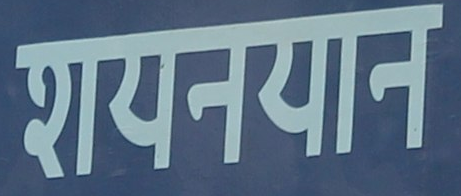

> Recognized text by 5-epoch-trained model : 	 ES9999999999999999999999


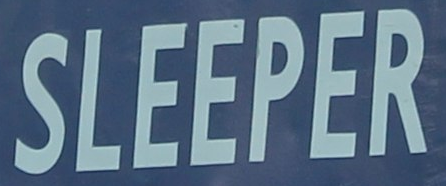

> Recognized text by 5-epoch-trained model : 	 VES999999999999999999999


In [30]:
for _img in cropped_img_list:
    display(_img)
    recognize_img_2(_img)

**üìù Ïã§ÌóòÍ≤∞Í≥º Î∂ÑÏÑù**
- CTC lossÍ∞Ä epoch=5 Ï†ÑÌõÑÎ°ú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏïòÏùÑ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÏóàÎäîÎç∞, ÎßâÏÉÅ Ïã§ÌóòÌï¥Î≥¥Îãà Ïç© Ï¢ãÏßÄ ÏïäÏïòÎã§... Ï∞®ÎùºÎ¶¨ epoch=10 ÏßÄÏ†êÏóêÏÑú Ïã§ÌóòÌñàÏùÑ ÎïåÏùò Ïã§Ìóò Í≤∞Í≥ºÍ∞Ä Îçî ÎÇòÏùÄ Í≤É Í∞ôÎã§...

### <span style = "background-color: #F0E9FF"> B. Try with PyTesseract!</span>

In [31]:
! sudo apt install tesseract-ocr
! sudo apt install libtesseract-dev
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
The following packages were automatically installed and are no longer required:
  accountsservice-ubuntu-schemas bc bluez-obexd cups cups-browsed cups-client
  cups-common cups-core-drivers cups-daemon cups-filters
  cups-filters-core-drivers cups-ipp-utils cups-ppdc cups-server-common
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript
  gir1.2-dbusmenu-glib-0.4 gnome-bluetooth gnome-power-manager
  gnome-screensaver gsettings-ubuntu-schemas gvfs-backends indicator-applet
  indicator-application indicator-appmenu indicator-bluetooth indicator-common
  indicator-datetime indicator-keyboard indicator-messages indicator-power
  indicator-printers indicator-session indicator-sound jayatana
  libaccounts-glib0 libbamf3-2 libcdio-cdda2 libcdio-paranoia2 libcdio18
  libcupsfilters1 libfcitx-config4 libfcitx-gclient1 libfc

In [34]:
import pytesseract
from pytesseract import Output

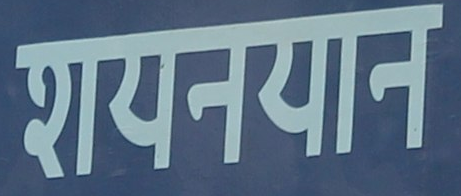

> Recognized text by PyTesseract model : 	 


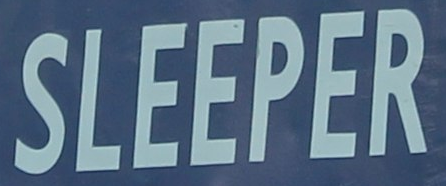

> Recognized text by PyTesseract model : 	 


In [38]:
for _img in cropped_img_list:
    display(_img)
    print("> Recognized text by PyTesseract model : \t",
          pytesseract.image_to_string(cropped_img_list[1]))

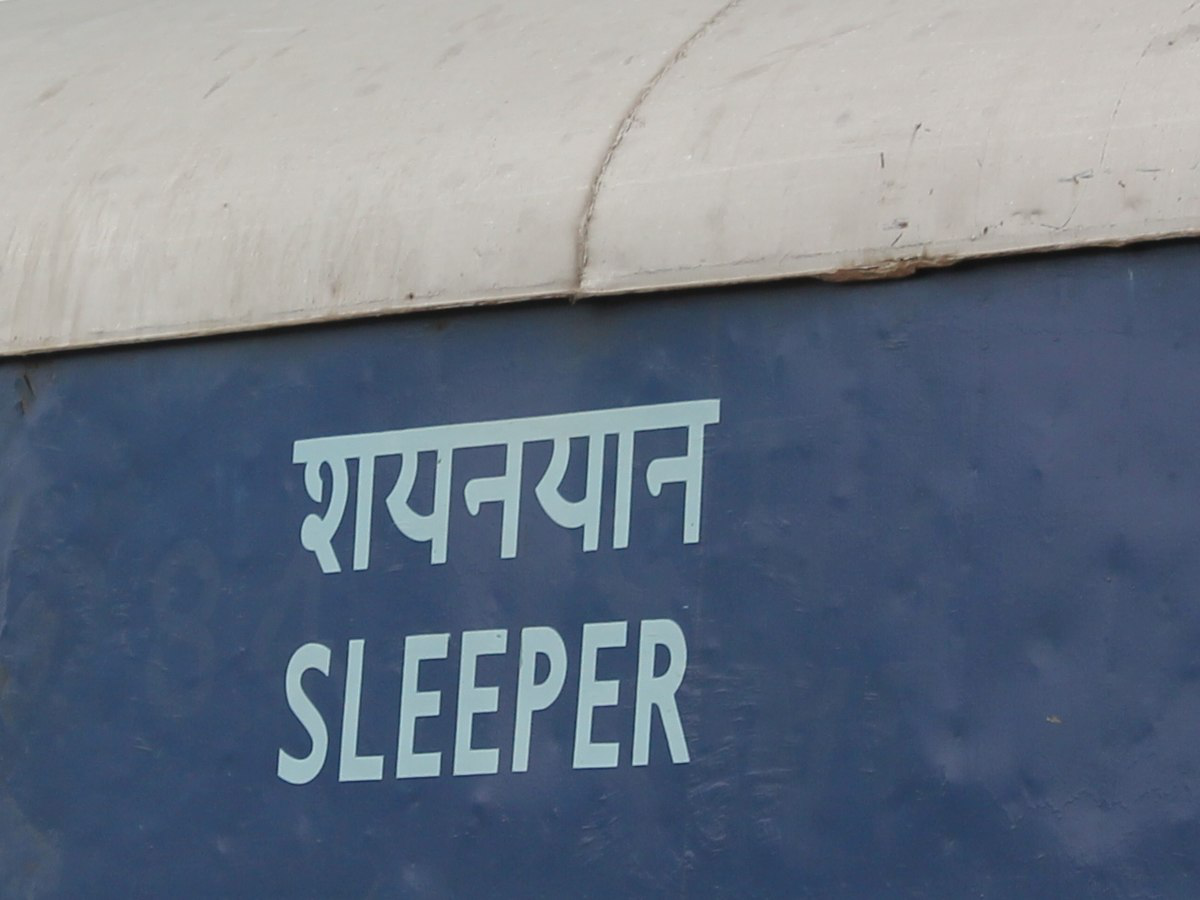

> Recognized text by PyTesseract model : 	  

qavat
ad



In [39]:
display(test_sample_img)
print("> Recognized text by PyTesseract model : \t",
      pytesseract.image_to_string(test_sample_img))

**üìù Ïã§ÌóòÍ≤∞Í≥º Î∂ÑÏÑù**
- PyTesseract Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ OCR Ïã§Ìóò Í≤∞Í≥º, text area Í∏∞Ï§ÄÏúºÎ°ú cropped images Î•º input ÏúºÎ°ú ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞ ÏïÑÎ¨¥Îü∞ Î¨∏ÏûêÎ•º Ïù∏ÏãùÌïòÏßÄ Î™ª ÌñàÎã§. ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÎ•º Í∑∏ÎåÄÎ°ú input ÏúºÎ°ú ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞ (Ïù∏Ïãù Ï†ïÌôïÎèÑÎäî ÎÇÆÏßÄÎßå) Î¨∏ÏûêÏó¥Ïùò Ï°¥Ïû¨Î•º Ïò¨Î∞îÎ•¥Í≤å Ïù∏ÏãùÌïòÍ∏¥ ÌñàÎã§.
- Í≥†ÏÑ±Îä•ÏúºÎ°ú Ïûò ÏïåÎ†§ÏßÑ Î™®Îç∏Ïù∏ Í≤ÉÏúºÎ°ú ÏïåÍ≥† ÏûàÎäîÎç∞, Ïù¥Î≤à Ïã§ÌóòÏóêÏÑú ÏÇ¨Ïö©Îêú Ïù¥ÎØ∏ÏßÄÎ°úÎäî Ï†ÑÌòÄ ÏÑ±Îä•ÏùÑ ÎΩêÎÇ¥ÏßÄ ÏïäÍ≥† ÏûàÎã§. Îì£Í∏∞Î°úÎäî Ï±ÖÏù¥ÎÇò ÏòÅÏàòÏ¶ù Í∞ôÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ ÌÖçÏä§Ìä∏Îäî Ïûò ÏùΩÏñ¥ÎÇ∏Îã§Í≥† ÌïòÎçòÎç∞, ÏïÑÎßà Ïù¥Î≤à Ïã§Ìóò Ïù¥ÎØ∏ÏßÄÏ≤òÎüº Í∏ÄÏûêÏàòÍ∞Ä ÌòÑÏ†ÄÌûà Ï†ÅÍ±∞ÎÇò Ìè∞Ìä∏Í∞Ä ÎëêÍ∫ºÏö¥... Í∑∏Îü∞ ÎîîÏûêÏù∏ Î™©Ï†ÅÏúºÎ°ú ÌëúÏãúÎêú ÌÖçÏä§Ìä∏Îì§ÏùÄ Ïûò Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÎäî Í≤å ÏïÑÎãêÍπå ÏÉùÍ∞ÅÌï¥Î≥∏Îã§. 

---